<Axes: xlabel='DOMINIO'>

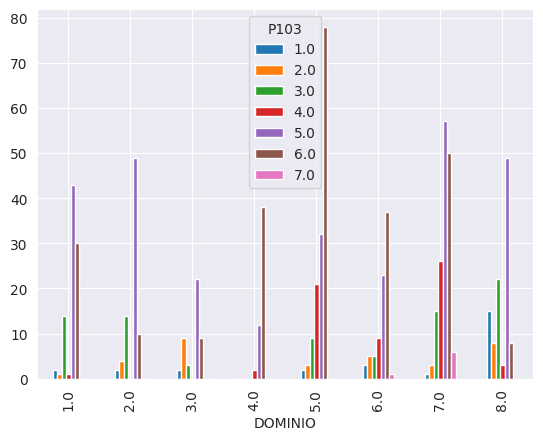

In [1]:
from ..survey import SurveyReader
from ..reporter import Reporter
from matplotlib import pyplot as plt
import pandas as pd


DATA_DIR = "../ENAHO/"

survey = SurveyReader(DATA_DIR)
survey.read_files()
reporter = Reporter(survey)
yearly_modules = reporter.yearly_modules()
yearly_cols = reporter.modules_dims("cols")
filenames = reporter.all_filenames()
# all_questions_report = reporter.all_questions()
# s_file = survey.get_file(2022, 3)
# stack = survey.data_columns("03", ["P300N", "P300I"])
col = survey.data_columns("01", ["P103"]).sample(1000)
labels = survey.value_labels("01", ["P103"])
tab = pd.crosstab(
    index=col.DOMINIO,
    columns=col.P103,
)
tab.plot(kind='bar')

In [10]:
col
# col.info()
col2 = survey.data_columns("01", ["P103"])
print(col2.info())
print(col2.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489461 entries, 0 to 489460
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AÑO       489461 non-null  object 
 1   MES       489461 non-null  object 
 2   CONGLOME  489461 non-null  object 
 3   VIVIENDA  489461 non-null  object 
 4   HOGAR     489461 non-null  object 
 5   UBIGEO    489461 non-null  object 
 6   DOMINIO   489461 non-null  float64
 7   P103      370668 non-null  float64
dtypes: float64(2), object(6)
memory usage: 29.9+ MB
None
(489461, 8)


In [11]:
counts = col['P103'].value_counts().reset_index(name='count')
counts.columns = ['P103', 'count']
counts


,P103,count
0,5.0,327
1,6.0,254
2,4.0,74
3,3.0,72
4,2.0,24
5,1.0,14
6,7.0,5


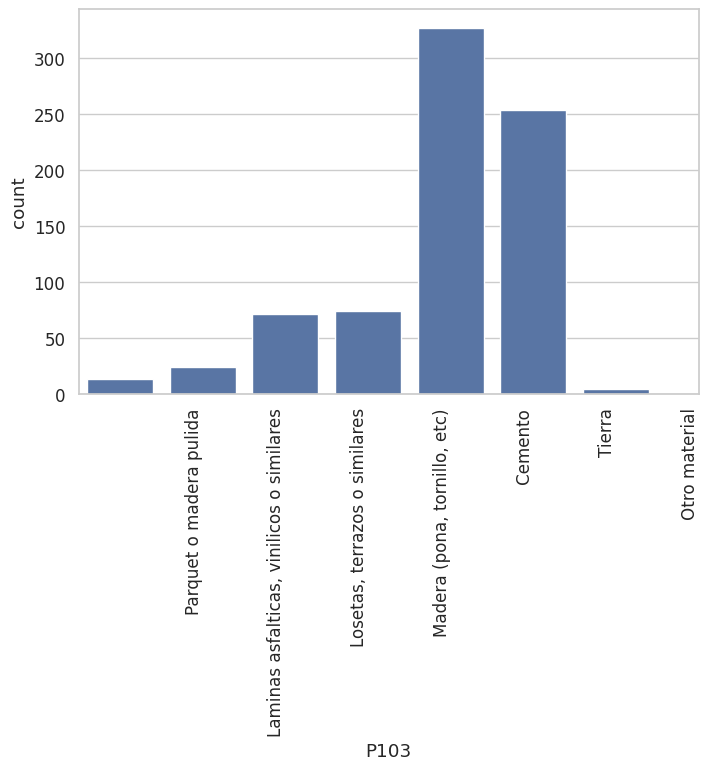

In [12]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.barplot(counts, x="P103", y="count")
value_labels = survey.value_labels("01", ["P103"])["P103"]
plt.xticks(rotation=90, ha='right')
plt.xticks(counts['P103'], [value_labels[x] for x in counts['P103']])
# plt.tight_layout()
plt.show()

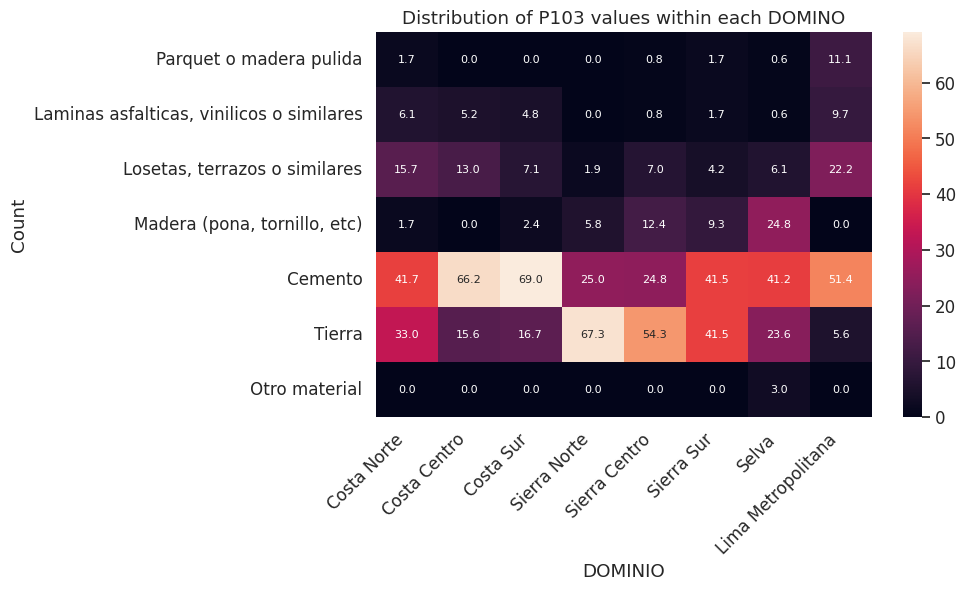

In [13]:
value_labels = survey.value_labels("01", ["P103", "DOMINIO"])
crosstab1 = pd.crosstab(col.P103, col.DOMINIO)
crosstab2 = pd.pivot_table(col, index='P103', columns='DOMINIO', aggfunc='count')
p103_axis_labels = [value_labels["P103"][x] for x in crosstab1.index.tolist()]
dominio_axis_labels = [value_labels["DOMINIO"][x] for x in crosstab1.columns.tolist()]

percentages = crosstab1.div(crosstab1.sum(axis=0), axis=1) * 100

# Ensure percentages are formatted as strings with a percent sign
# percentages = percentages.map(lambda x: f"{x:.0f}%")
# percentages = percentages.map('{:.1f}%'.format)
# Create the heatmap using the custom labels
sns.heatmap(percentages, annot=True,
            fmt=".1f", annot_kws={"fontsize": 8},
            xticklabels=dominio_axis_labels, yticklabels=p103_axis_labels)

# Adjust tick labels to show percentages explicitly
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.xlabel("DOMINIO")
plt.ylabel("Count")
plt.title("Distribution of P103 values within each DOMINO")
plt.show()

In [15]:
col = survey.data_columns("05", ["P524B1"]).sample(1000)

<Axes: xlabel='period', ylabel='P524B1'>

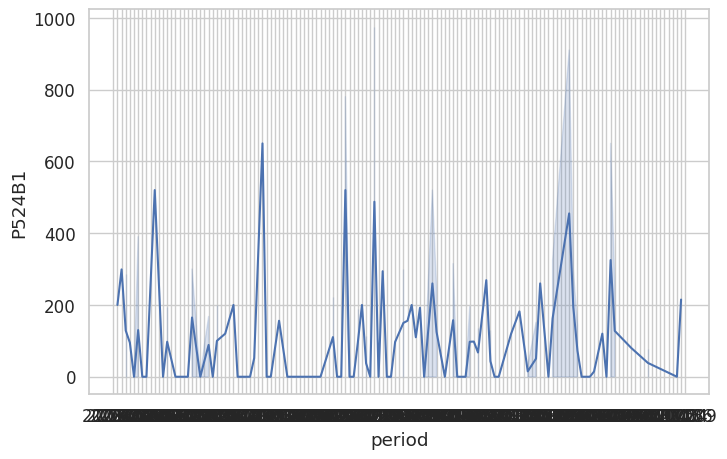

In [27]:
import seaborn as sns
col["period"] = col["AÑO"]+col["MES"]
sns.lineplot(data=col.sample(500), x="period", y="P524B1")

692723     201905
656635     201801
961660     202204
1020424    202207
462632     201504
dtype: object